In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Name']=lb.fit_transform(df['Name'])
df['Sex']=lb.fit_transform(df['Sex'])
df['Ticket']=lb.fit_transform(df['Ticket'])
df['Cabin']=lb.fit_transform(df['Cabin'])
df['Embarked']=lb.fit_transform(df['Embarked'])

In [4]:
df.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Survived         0
dtype: int64

In [5]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [6]:
x=df.iloc[:,:-1].values
x

array([[  1.    , 108.    ,   3.    , ...,   7.25  , 147.    ,   2.    ],
       [  2.    , 190.    ,   1.    , ...,  71.2833,  81.    ,   0.    ],
       [  3.    , 353.    ,   3.    , ...,   7.925 , 147.    ,   2.    ],
       ...,
       [889.    , 413.    ,   3.    , ...,  23.45  , 147.    ,   2.    ],
       [890.    ,  81.    ,   1.    , ...,  30.    ,  60.    ,   0.    ],
       [891.    , 220.    ,   3.    , ...,   7.75  , 147.    ,   1.    ]])

In [7]:
y=df.iloc[:,-1]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.73010796, -1.31021659,  0.82737724, ..., -0.50244517,
         0.45150219,  0.58111394],
       [-1.72622007, -0.99141018, -1.56610693, ...,  0.78684529,
        -1.38162664, -1.93846038],
       [-1.72233219, -0.35768524,  0.82737724, ..., -0.48885426,
         0.45150219,  0.58111394],
       ...,
       [ 1.72233219, -0.12441226,  0.82737724, ..., -0.17626324,
         0.45150219,  0.58111394],
       [ 1.72622007, -1.41518943, -1.56610693, ..., -0.04438104,
        -1.9648949 , -1.93846038],
       [ 1.73010796, -0.87477369,  0.82737724, ..., -0.49237783,
         0.45150219, -0.67867322]])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

# KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

77.61194029850746

# LogisticRegression

Test accuracy: 0.7723880597014925
train accuracy: 0.8186195826645265


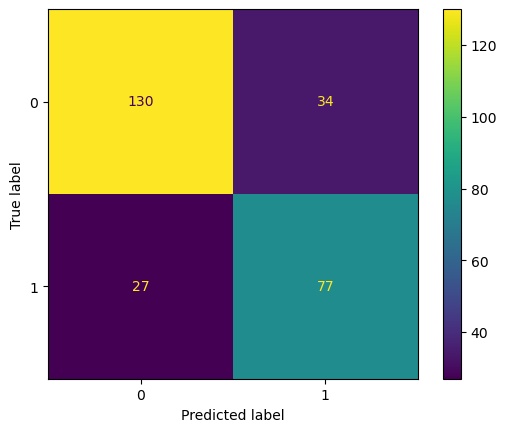

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
test_pred=model.predict(x_test)
train_pred=model.predict(x_train)

from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
print('Test accuracy:',accuracy_score(y_test,test_pred))
print('train accuracy:',accuracy_score(y_train,train_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,test_pred))


# naive_bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [18]:
from sklearn.metrics import classification_report
print('CR:',classification_report(y_test,y_pred))

CR:               precision    recall  f1-score   support

           0       0.75      0.82      0.78       164
           1       0.67      0.58      0.62       104

    accuracy                           0.72       268
   macro avg       0.71      0.70      0.70       268
weighted avg       0.72      0.72      0.72       268



# SVC

In [20]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('CR:',classification_report(y_test,y_pred))


CR:               precision    recall  f1-score   support

           0       0.82      0.82      0.82       164
           1       0.71      0.72      0.72       104

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [21]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
lm=SVC(kernel='linear',C=900)
lm.fit(x_train,y_train)
print(lm.score(x_test,y_test))

y_pred=lm.predict(x_test)
print('mse',mean_squared_error(y_test,y_pred))
print('ac',accuracy_score(y_test,y_pred))

0.7798507462686567
mse 0.22014925373134328
ac 0.7798507462686567


In [22]:
poly=SVC(kernel='poly',degree=5,C=100)
poly.fit(x_train,y_train)
print(poly.score(x_test,y_test))

y_pred=poly.predict(x_test)
print('mse',mean_squared_error(y_test,y_pred))
print('acs',accuracy_score(y_test,y_pred))

0.7761194029850746
mse 0.22388059701492538
acs 0.7761194029850746


In [23]:
sg=SVC(kernel='sigmoid',C=100)
sg.fit(x_train,y_train)
print(poly.score(x_test,y_test))

y_pred=sg.predict(x_test)
print('mse',mean_squared_error(y_test,y_pred))
print('acs',accuracy_score(y_test,y_pred))

0.7761194029850746
mse 0.3283582089552239
acs 0.6716417910447762


In [24]:
print(accuracy_score(y_test,y_pred)*100)

67.16417910447761


# DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
print(accuracy_score(y_test,y_pred)*100)

67.16417910447761


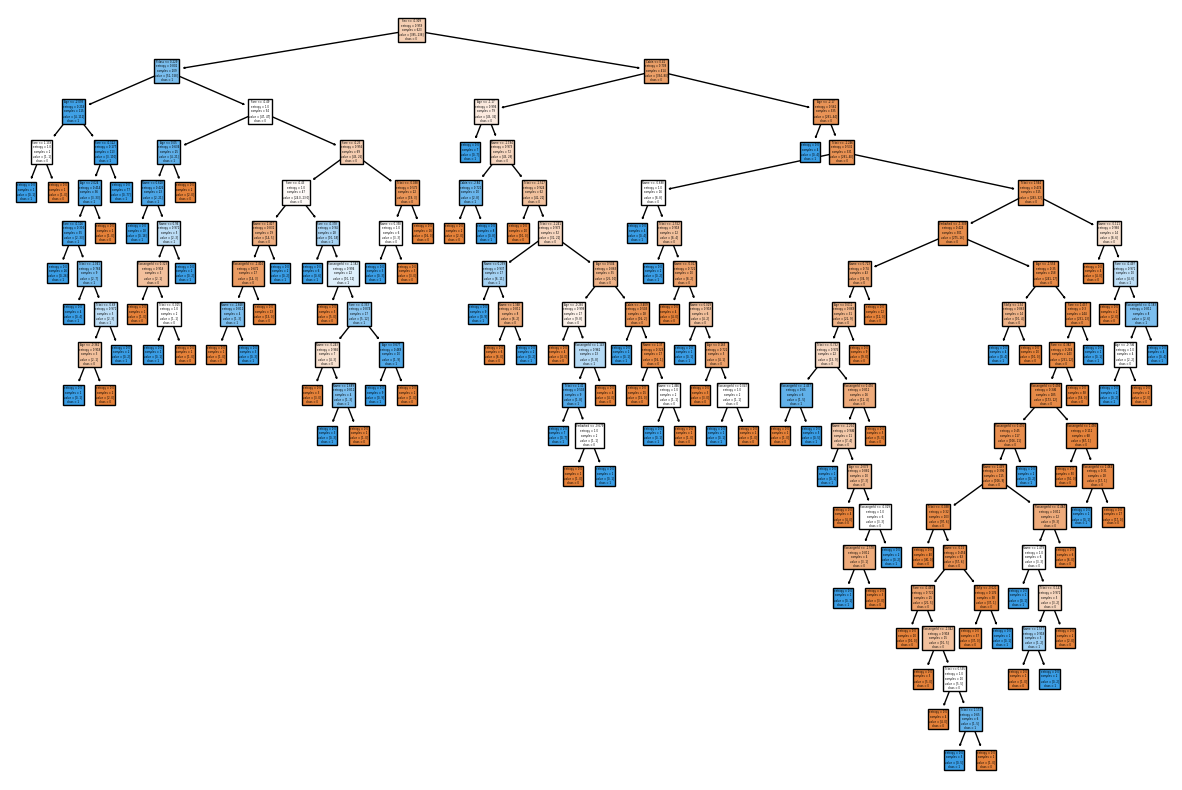

In [27]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True,feature_names=['PassengerId','Name','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare', 'Cabin', 'Embarked', 'Survived'],class_names=['0','1'])
plt.show()

In [28]:
#END